In [453]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
scenario = "testing"
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=13) 
plt.rc('xtick', labelsize=13) 

In [454]:
# scecific_year_file = r'C:\toolbox-amiris-emlab\emlabpy\plots\Scenarios\NL-2009\2089.xlsx'
# print(scecific_year_file)
# elec_prices_data = pd.read_excel(scecific_year_file,sheet_name='energy_exchange', index_col=0)
# results_data = pd.read_excel(scecific_year_file,sheet_name='hourly_generation', index_col=0)
# path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS_Results", scenario )

In [455]:

#path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow", "2050example")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow" )
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")

path_to_h2 = os.path.join(path_to_results, "amiris-config", "data","LS_hydrogen_high.csv")
#path_to_industrial = os.path.join(path_to_results, "amiris-config", "data","LS_industrial.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
#path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_residual_load = os.path.join(path_to_results, "output","residual_load.csv")

path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )

In [456]:
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS_Results", scenario )
if not os.path.exists(path_to_plots):
    os.makedirs(path_to_plots)
#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
# load_data = pd.read_csv(path_to_load, sep=";", header=None) 


h2_high_data = pd.read_csv(path_to_h2, sep=";", header=None) 
#industrial_data = pd.read_csv(path_to_industrial, sep=";", header=None) 
residual_load_data = pd.read_csv(path_to_residual_load, sep=",", index_col=0) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
renewables_data = pd.read_excel(path_to_structure, sheet_name='renewables', index_col=0)
electrolysers_data = pd.read_excel(path_to_structure, sheet_name='electrolysers', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)
load_shedders_data = pd.read_excel(path_to_structure, sheet_name='load_shedding')

# Why is the electrolysis_hydrogen_generation given in the load generation? I think that value is not needed. 


In [457]:
loads = pd.DataFrame()
for rownum,(indx,i)  in enumerate(load_shedders_data["TimeSeries"].items()): 
    
    if i != "amiris-config/data/LS_hydrogen_high.csv":
        print(i)
        path_to_load = os.path.join(path_to_results, i)
        load = pd.read_csv(path_to_load, sep=";", header=None)
        loads[rownum] = load[1]
    

amiris-config/data/load.csv
amiris-config/data/LS_high.csv
amiris-config/data/LS_low.csv
amiris-config/data/LS_mid.csv


In [458]:
loads

,0,1,3,4
0,15252.790139,1906.598767,953.299384,953.299384
1,15145.580949,1893.197619,946.598809,946.598809
2,14892.018165,1861.502271,930.751135,930.751135
3,14837.826958,1854.728370,927.364185,927.364185
4,15194.428906,1899.303613,949.651807,949.651807
...,...,...,...,...
8755,16571.340917,2071.417615,1035.708807,1035.708807
8756,15480.424429,1935.053054,967.526527,967.526527
8757,14758.344788,1844.793099,922.396549,922.396549
8758,14244.236912,1780.529614,890.264807,890.264807


In [459]:
load_data = loads.sum(axis=1)

In [460]:
load_data.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       19065.987673
1       18931.976186
2       18615.022706
3       18547.283698
4       18993.036132
            ...     
8755    20714.176146
8756    19350.530536
8757    18447.930985
8758    17805.296140
8759    16847.001174
Length: 8760, dtype: float64>

In [461]:
fuelprices = pd.read_excel(path_to_structure, sheet_name='scenario_data_emlab', index_col=0)
industrial_heat_price = fuelprices.loc[1,"HYDROGEN"]
fuelprices

,AgentType,CO2,OTHER,HARD_COAL,OIL,HYDROGEN,LIGNITE,NATURAL_GAS,NUCLEAR,WASTE,BIOMASS
0,CarbonMarket,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FuelsMarket,NaN,45.1,6.73,79.69,48.579253,6.48,14.65,1.69,7.5,35.0


In [462]:
print("Conventionals " + str(conventionals_data["InstalledPowerInMW"].sum()/1000))
print("Renewables " + str(renewables_data["InstalledPowerInMW"].sum()/1000))
print("electrolysers " + str(electrolysers_data["PeakConsumptionInMW"].sum()/1000))
print("biogas " + str(biogas_data["InstalledPowerInMW"].sum()/1000))

Conventionals 18.663943
Renewables 118.4
electrolysers 11.775
biogas 0.0


In [463]:
electrolyser_capacity = h2_high_data[1][0] 
input_hydrogen_demand = h2_high_data[1].sum()
print(input_hydrogen_demand)

359781959.00000006


In [464]:
elec_prices_data

,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
0,1,946080003,41512.339242,33.374000,142767.334812
1,1,946083603,42403.037079,33.374000,144819.165551
2,1,946087203,43296.092915,33.374000,146818.381939
3,1,946090803,45199.344588,33.374000,151506.208442
4,1,946094403,45932.950634,33.374000,153162.562766
...,...,...,...,...,...
8755,1,977598003,20714.176146,114.250000,328265.171857
8756,1,977601603,19350.530536,114.250000,137635.767034
8757,1,977605203,19305.897972,48.580253,89368.194606
8758,1,977608803,19864.455670,48.580253,90740.293219


In [465]:
windon = renewables_data[renewables_data["Set"] =="WindOn"]
print(windon["InstalledPowerInMW"].sum())
windoff = renewables_data[renewables_data["Set"] =="WindOff"]
print(windoff["InstalledPowerInMW"].sum())
PV = renewables_data[renewables_data["Set"] =="OtherPV"]
print(PV["InstalledPowerInMW"].sum())
ROR = renewables_data[renewables_data["Set"] =="RunOfRiver"]
print(ROR["InstalledPowerInMW"].sum())

12000
37000
69400
0


In [466]:
max_output_onshore = 2978 # capacity factor times hours = FLH
max_output_offshore = 4730
max_output_pv = 1059
max_output_ror = 2102
theoretical_max_offshore = max_output_offshore*windoff["InstalledPowerInMW"].sum() # MWH
theoretical_max_onshore = max_output_onshore*windon["InstalledPowerInMW"].sum()
theoretical_max_pv = max_output_pv*PV["InstalledPowerInMW"].sum()
theoretical_max_ror = max_output_ror*ROR["InstalledPowerInMW"].sum()
max_RES = theoretical_max_offshore + theoretical_max_onshore + theoretical_max_pv  + theoretical_max_ror

In [467]:
windon_join = pd.merge(windon, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(windon_join["PRODUCTION_IN_MWH"].sum()/1000000)
windoff_join = pd.merge(windoff, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(windoff_join["PRODUCTION_IN_MWH"].sum()/1000000)
PV_join = pd.merge(PV, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(PV_join["PRODUCTION_IN_MWH"].sum()/1000000)
ROR_join = pd.merge(ROR, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(ROR_join["PRODUCTION_IN_MWH"].sum()/1000000)

47.36628990338903
166.07654735390798
104.66358777238082
0.0


In [468]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
storages_results = pd.merge(storages_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results = pd.merge(electrolysers_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
renewables_results = pd.merge(renewables_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
renewables_results.head()
installed_RES = renewables_results["InstalledPowerInMW"].sum()
installed_RES

118400

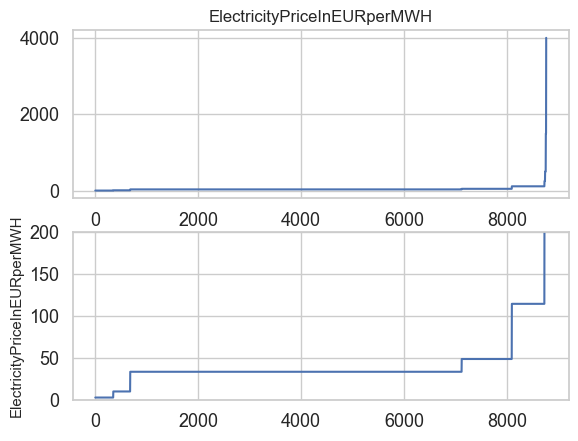

In [469]:
sorted_elec_prices = elec_prices_data["ElectricityPriceInEURperMWH"].copy()
fig, axes= plt.subplots(nrows=2, ncols=1)
sorted_elec_prices.sort_values(ignore_index=True, inplace=True)
axs1 = sorted_elec_prices.plot(ax=axes[0])
plt.ylim([0, 200])
axs2 = sorted_elec_prices.plot(ax=axes[1])
plt.ylabel('ElectricityPriceInEURperMWH', fontsize='small')
axes[0].set_title('ElectricityPriceInEURperMWH')
fig.savefig(path_to_plots + '/' + 'elec_prices.png', bbox_inches='tight', dpi=300)


In [470]:
copyRS

,residual_load_actual_infeed,planned_demand,res_potential,curtailed_res
0,-11775.0000,61941.1199,82488.2220,8772.1021
1,-11775.0000,60138.8083,72641.8680,728.0597
2,-11775.0000,61175.0860,78524.3039,5574.2179
3,-11775.0000,61168.0458,82269.1489,9326.1030
4,-11775.0000,59926.8443,78209.7696,6507.9254
...,...,...,...,...
8755,64874.6525,68351.4395,3476.7871,0.0000
8756,65647.4884,68153.4680,2505.9796,0.0000
8757,66922.6019,70443.6449,3521.0430,0.0000
8758,66928.8132,67957.2837,1028.4705,0.0000


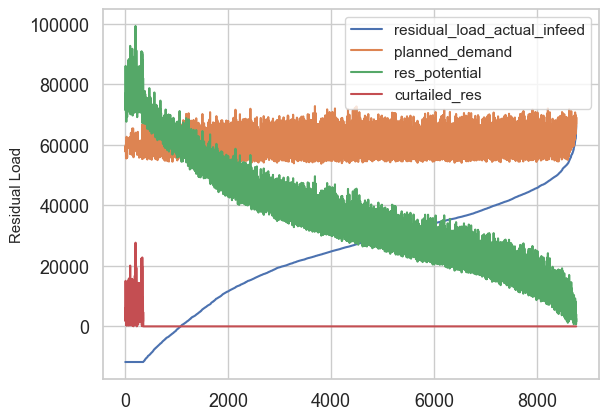

In [471]:
copyRS =residual_load_data.copy()
copyRS.sort_values(by="residual_load_actual_infeed",ignore_index=True, inplace=True)
axs1 = copyRS.plot()

plt.ylabel('Residual Load', fontsize='small')
axes[0].set_title('Residual Load')
fig.savefig(path_to_plots + '/' + 'Residual_Load.png', bbox_inches='tight', dpi=300)



In [472]:
residual_load_data[residual_load_data["residual_load_actual_infeed"] ==0]

,residual_load_actual_infeed,planned_demand,res_potential,curtailed_res


In [473]:
min(residual_load_data["residual_load_actual_infeed"])

-11775.0

In [474]:
elec_prices_data[residual_load_data["residual_load_actual_infeed"] <0]["ElectricityPriceInEURperMWH"].unique()

array([33.374     ,  9.92982456,  2.7       ])

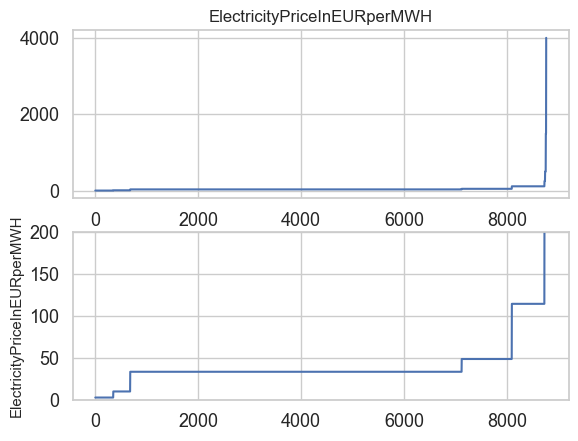

In [475]:
sorted_elec_prices = elec_prices_data["ElectricityPriceInEURperMWH"].copy()
fig, axes= plt.subplots(nrows=2, ncols=1)
sorted_elec_prices.sort_values(ignore_index=True, inplace=True)
axs1 = sorted_elec_prices.plot(ax=axes[0])
plt.ylim([0, 200])
axs2 = sorted_elec_prices.plot(ax=axes[1])
plt.ylabel('ElectricityPriceInEURperMWH', fontsize='small')
axes[0].set_title('ElectricityPriceInEURperMWH')
fig.savefig(path_to_plots + '/' + 'elec_prices.png', bbox_inches='tight', dpi=300)

In [476]:
hourly_prices = elec_prices_data[["ElectricityPriceInEURperMWH"]].copy()
hourly_prices['group'] = list(range(0,24))*365
highest_prices = hourly_prices.groupby(['group']).mean()
highest_prices = highest_prices.sort_values(by=['ElectricityPriceInEURperMWH'], ascending=False)

In [477]:
load_data.head()

0    19065.987673
1    18931.976186
2    18615.022706
3    18547.283698
4    18993.036132
dtype: float64

In [478]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1)
# load_generation.drop(0, axis=1, inplace=True) # dropping timeseries
load_generation.rename(columns={0: "load" }, inplace=True)
# load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
# load_generation.reset_index(inplace=True )
#load_generation.drop("index", axis=1, inplace=True)
load_generation.drop("electrolysis_hydrogen_generation", axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,PV,WindOff,WindOn,unit_3337400,unit_25000000,unit_50000000,unit_150000000,unit_400000000,load
0,35848.396242,5663.943,0,0,0,30399.648317,11775.0,0.0,28244.473755,7603.922488,30399.648317,0.0,0.0,0.0,0.0,19065.987673
1,36739.094079,5663.943,0,0,0,29374.938993,11775.0,0.0,28873.650540,7865.443538,29374.938993,0.0,0.0,0.0,0.0,18931.976186
2,37632.149915,5663.943,0,0,0,28164.929677,11775.0,0.0,29461.495732,8170.654184,28164.929677,0.0,0.0,0.0,0.0,18615.022706
3,39535.401588,5663.943,0,0,0,26193.938995,11775.0,0.0,31030.708135,8504.693453,26193.938995,0.0,0.0,0.0,0.0,18547.283698
4,40269.007634,5663.943,0,0,0,25906.085384,11775.0,0.0,31524.031219,8744.976415,25906.085384,0.0,0.0,0.0,0.0,18993.036132


In [479]:
RES_mwh_scarcity = load_generation["res"].loc[ (load_generation['load_shedding'] > 40000 )].mean()
# derating factor
derating_factor = RES_mwh_scarcity/installed_RES
derating_factor

0.14324652818934525

In [480]:
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)

In [481]:
RES_use = round((load_generation["res"].sum()/max_RES)*100,2)

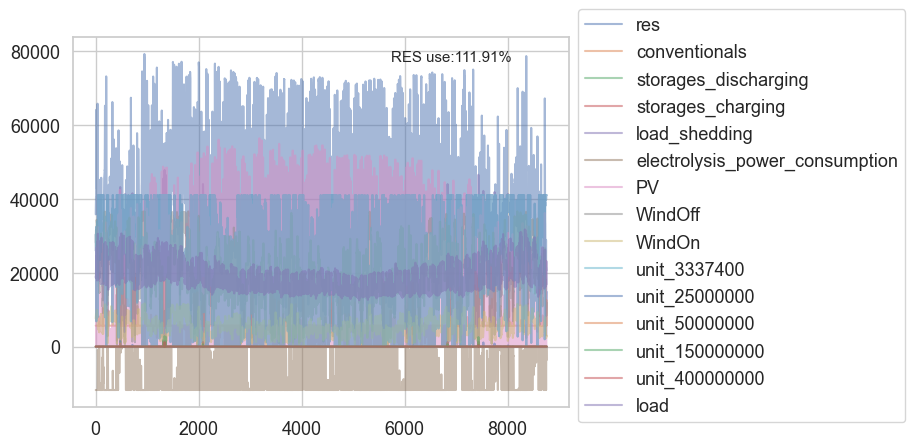

In [482]:
axs1= load_generation.plot(alpha=0.5)
plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
axs1.annotate("RES use:" + str(RES_use ) + "%",
               xy=(0.8, 0.8), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='bottom',
               fontsize='small')
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

,res,conventionals,storages_discharging,storages_charging,load_shedding,electrolysis_power_consumption,PV,WindOff,WindOn,unit_3337400,unit_25000000,unit_50000000,unit_150000000,unit_400000000,load
0,35848.396242,5663.943,0,0,30399.648317,11775.0,0.0,28244.473755,7603.922488,30399.648317,0.0,0.0,0.0,0.0,19065.987673
1,36739.094079,5663.943,0,0,29374.938993,11775.0,0.0,28873.650540,7865.443538,29374.938993,0.0,0.0,0.0,0.0,18931.976186
2,37632.149915,5663.943,0,0,28164.929677,11775.0,0.0,29461.495732,8170.654184,28164.929677,0.0,0.0,0.0,0.0,18615.022706
3,39535.401588,5663.943,0,0,26193.938995,11775.0,0.0,31030.708135,8504.693453,26193.938995,0.0,0.0,0.0,0.0,18547.283698
4,40269.007634,5663.943,0,0,25906.085384,11775.0,0.0,31524.031219,8744.976415,25906.085384,0.0,0.0,0.0,0.0,18993.036132


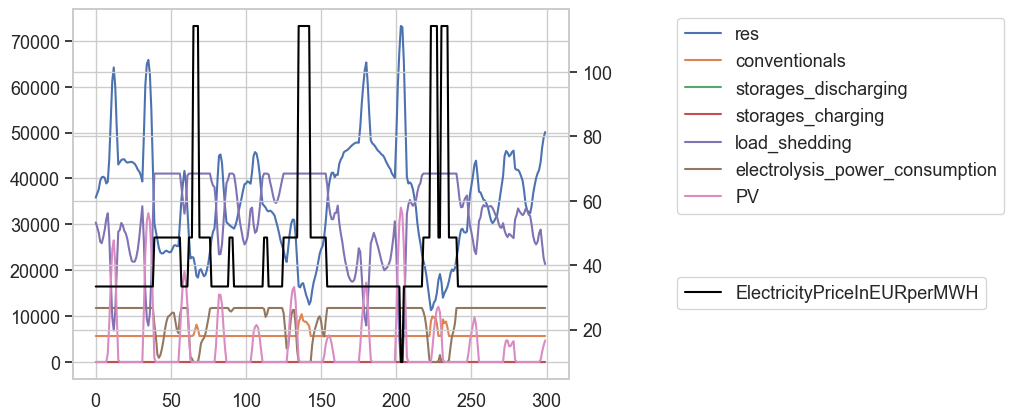

In [483]:
ElectricityPriceInEURperMWH = elec_prices_data["ElectricityPriceInEURperMWH" ]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.iloc[0:300,0:7].plot( ax=ax1)

ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.plot(ElectricityPriceInEURperMWH.loc[0:300] , color = "black")
#ax2.set_ylim(-1000, 4100)
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'timeseries.png', bbox_inches='tight', dpi=300)

load_generation.head()

In [484]:
fuel_colors = {
    'Industrial heat': "black",
    'H2 turbine': "darkred",
    "PV": "gold",
    'Nuclear': "mediumorchid",
    'Offshore': "navy",
    'Onshore': "blue",
    'notfound': "purple",
    'Electrolyzer': "gray",
    "LowLS": "lemonchiffon",
    'HighLS': "darkorange",
    'MedLS': "orange",
    "VOLL": "lime",
    "Wind and Solar": "green",
    "Nuclear and H2 turbines" : "darkred", 
    "Inflexible Load": "purple"
}

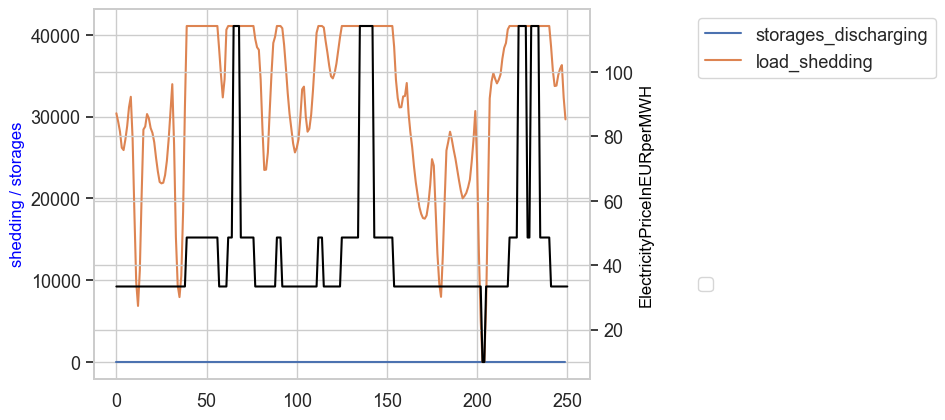

In [485]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
load_generation.iloc[0:250,[2,4]].plot( ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
ax2.plot(ElectricityPriceInEURperMWH.loc[0:250] , color = "black")
ax1.set_ylabel('shedding / storages',  color = "blue")
ax2.set_ylabel('ElectricityPriceInEURperMWH', color = "black")
fig.savefig(path_to_plots + '/' + 'storages_loadshedding.png', bbox_inches='tight', dpi=300)

In [486]:
# plt.stackplot( load_generation.index, load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_discharging,  labels=['RES', 'conventional', "load shedding", "dish", "charg"]  )


In [487]:
storages = None
if storages != None:
    path_to_storages_raw = os.path.join(path_to_results, "output","raw","StorageTrader.csv")
    storages_raw = pd.read_csv(path_to_storages_raw, sep=";") 
    storages_results["InstalledPowerInMW"].sum()
    #storage_levels_data["value"][1:].plot.scatter() # 
    storage_levels_data.reset_index().plot.scatter(x = 'index', y = 'value')
    production = storages_results['PRODUCTION_IN_MWH'].sum()
    discharging = generation_data["storages_discharging"].sum()
    charging = generation_data["storages_charging"].sum()

    print("storages GW: " + str(storages_data["InstalledPowerInMW"].sum()/1000))
    
    total_battery_use = load_generation["storages_discharging"].sum()
    print("batteries use GWh: " + str(total_battery_use/1000))
    
    batteries_FLH = (total_battery_use/storages_data["InstalledPowerInMW"].sum())
    print("batteries_FLH: " + str(batteries_FLH)) 
    print("production/discharging "+ str(production/discharging) )
    discharging/charging

In [488]:
#this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# storages_bids_discharge = storages_raw["OfferedDischargePriceInEURperMWH"].dropna()
# storages_bids_discharge.reset_index(drop=True, inplace = True)
# storages_bids_charge = storages_raw["OfferedChargePriceInEURperMWH"].dropna()
# storages_bids_charge.reset_index(drop=True, inplace = True)
# storages_bids_charge.sort_values(ignore_index=True).plot()

# AwardedDischargePowerInMWH = storages_raw["AwardedDischargePowerInMWH"].dropna()
# AwardedDischargePowerInMWH.reset_index(drop=True, inplace = True)
# plt.scatter(x = ElectricityPriceInEURperMWH , y= AwardedDischargePowerInMWH )
# plt.legend()
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("AwardedDischargePowerInMWH")
# plt.savefig(path_to_plots + '/' + 'DischargePowervsprices.png', bbox_inches='tight', dpi=300)
# plt.show()
# plt.close()
# x = storages_bids_discharge.values.reshape(-1,1)
# y = storages_bids_charge.values.reshape(-1,1)
# regr = LinearRegression()
# regr.fit(x, y)
# fig = plt.scatter(x, y,  color='black')
# plt.plot(x, regr.predict(x), color='blue', linewidth=3)
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("OfferedDischargePriceInEURperMWH")
# plt.legend()
# plt.show()
# print("Coefficients: \n", regr.coef_)
# fig, ax1 = plt.subplots()
# storages_bids_discharge.loc[8500:8760].plot(color = "blue")
# ElectricityPriceInEURperMWH.loc[8500:8760].plot( color = "black")
# ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))


In [489]:
# plt.scatter(x = ElectricityPriceInEURperMWH , y= load_generation["storages_discharging"] )
# plt.legend()
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("storages_discharging")
# plt.savefig(path_to_plots + '/' + 'BatteriesProductionvsPricesTimeseries.png', bbox_inches='tight', dpi=300)
# load_generation["storages_discharging"].sum()

In [490]:
# storages = load_generation[["storages_charging", "storages_discharging"]].copy()
# sum_storages = storages.sum().divide(1000).to_string()
# print(sum_storages)
# ax1 = storages.iloc[0:100,:].plot.area()
# ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
# ax1.annotate(sum_storages,
#                xy=(0.9, 0.8), xycoords='figure fraction',
#                horizontalalignment='right', verticalalignment='top',
#                fontsize='small')
# fig1 = ax1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'storages_timeseries.png', bbox_inches='tight', dpi=300)

In [491]:
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# storages.iloc[0:100,:].plot( ax=ax1, alpha=0.95)
# #load_generation.iloc[8000:8120,4].plot( ax=ax1, alpha=0.95)
# ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
# ax2.plot(ElectricityPriceInEURperMWH.loc[0:100] , color = "black")
# ax1.set_ylabel('charging/dischargingMW',  color = "orange")
# ax2.set_ylabel('ElectricityPriceInEURperMWH')
# ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.5))
# fig1 = ax1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'storages_timeseries_short.png', bbox_inches='tight', dpi=300)

In [492]:
industrialConsumptioninMWh  = load_generation["electrolysis_power_consumption"]

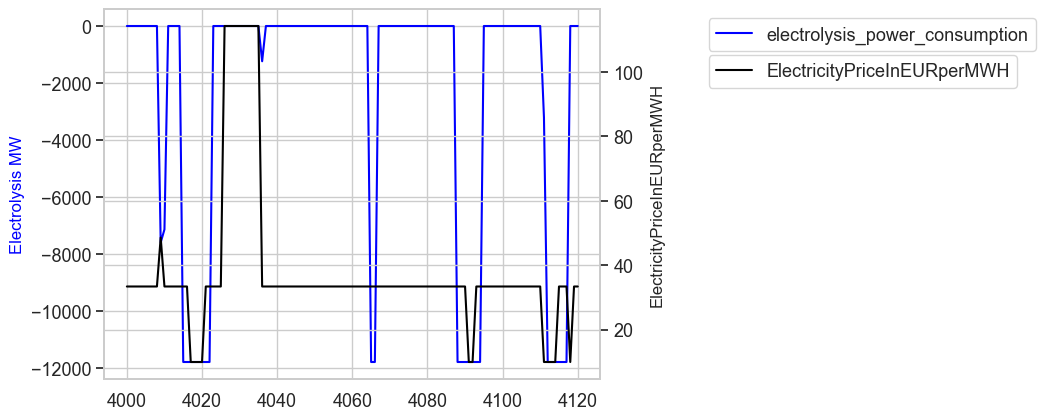

In [493]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
industrialConsumptioninMWh = industrialConsumptioninMWh*-1
industrialConsumptioninMWh.loc[4000:4120].plot( ax=ax1, color = "blue")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[4000:4120] , color = "black")
ax1.set_ylabel('Electrolysis MW', color = "blue")
ax2.set_ylabel('ElectricityPriceInEURperMWH')
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.9))
plt.savefig(path_to_plots + '/' + 'H2vsPricesTimeseries.png', bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>

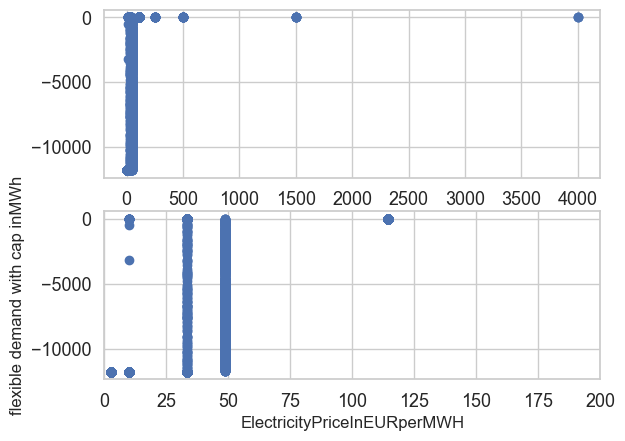

In [494]:
electricityPrice= ElectricityPriceInEURperMWH.values.reshape(-1,1)
industrialPower = industrialConsumptioninMWh.values.reshape(-1,1)
#fig = plt.scatter(electricityPrice, electrolysisPower)
f = plt.figure()  
fig, axes= plt.subplots(nrows=2, ncols=1)
axes[0].scatter(electricityPrice, industrialPower)

axes[1].scatter(electricityPrice, industrialPower)
plt.xlim([0, 200])
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("flexible demand with cap inMWh")
plt.savefig(path_to_plots + '/' + 'H2vsPrices.png', bbox_inches='tight', dpi=300)

In [495]:
h2prices = pd.DataFrame(list(zip(ElectricityPriceInEURperMWH, industrialConsumptioninMWh)),
              columns =['electricityPrice', 'flexiblePowerCap'])
h2prices.head()

,electricityPrice,flexiblePowerCap
0,33.374,-11775.0
1,33.374,-11775.0
2,33.374,-11775.0
3,33.374,-11775.0
4,33.374,-11775.0


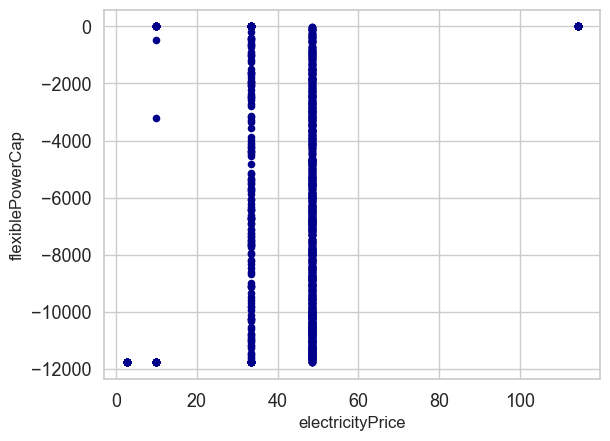

In [496]:
h2prices_filtered = h2prices[h2prices["electricityPrice"] < 200]
ax1 = h2prices_filtered.plot.scatter(x='electricityPrice',
                       y='flexiblePowerCap',
                       c='DarkBlue')
plt.savefig(path_to_plots + '/' + 'flexiblePowerCapvsPricesZoom.png', bbox_inches='tight', dpi=300)
# merged_df.head()


In [497]:
hydrogen_VOLL   = load_shedders_data.loc[load_shedders_data['TimeSeries'] == "amiris-config/data/LS_hydrogen_high.csv", 'VOLL'].sum()
low_VOLL   = load_shedders_data.loc[load_shedders_data['TimeSeries'] == "amiris-config/data/LS_low.csv", 'VOLL'].sum()
mid_VOLL   = load_shedders_data.loc[load_shedders_data['TimeSeries'] == "amiris-config/data/LS_mid.csv", 'VOLL'].sum()
high_VOLL   = load_shedders_data.loc[load_shedders_data['TimeSeries'] == "amiris-config/data/LS_high.csv", 'VOLL'].sum()
load_shedders_data.sort_values(by=['VOLL'], ascending=False, inplace=True)
load_shedders_data.reset_index(inplace=True)

In [498]:
hydrogen_load = 41071
maximumLS = pd.DataFrame()
maximumLS['hydrogen'] = [hydrogen_load]*8760
maximumLS['LS_low'] = load_data[1]*0.05
# load is 80% so 5% corresponds to 6.25%
maximumLS['LS_mid'] = load_data[1]*0.05
maximumLS['LS_high'] = load_data[1]*0.10
maximumLS['base'] = load_data[1]*0.8
maximumLS.head()

,hydrogen,LS_low,LS_mid,LS_high,base
0,41071,946.598809,946.598809,1893.197619,15145.580949
1,41071,946.598809,946.598809,1893.197619,15145.580949
2,41071,946.598809,946.598809,1893.197619,15145.580949
3,41071,946.598809,946.598809,1893.197619,15145.580949
4,41071,946.598809,946.598809,1893.197619,15145.580949


In [499]:
load_shedded_per_group = pd.DataFrame()
nextcolumns =  maximumLS.columns
last = []
for num, column in enumerate(maximumLS.columns):
    print(column)
    if num == 0 :
        load_shedded_per_group[column] =  load_generation["load_shedding"] # hydrogen shedding same as load shedding 
    else: # next load shedders are load shedded minus the last load shedders

        load_shedded_per_group[column] =  load_generation["load_shedding"]  - maximumLS[last].sum(axis=1)
    last.append(column)

hydrogen
LS_low
LS_mid
LS_high
base


In [500]:
load_shedded_per_group['load_shedding'] = load_generation["load_shedding"]
load_shedded_per_group['ElectricityPriceInEURperMWH'] = ElectricityPriceInEURperMWH

In [501]:
# now amiris prints results

# load_shedders_data['VOLLnext'] = load_shedders_data['VOLL'].shift(-1)
# load_shedders_data.at[4, 'VOLLnext'] = -100
# dict_LS_VOLL = {33:"hydrogen", 250: "LS_low"  , 500 : "LS_mid" , 1500: "LS_high" , 4000:"base"}

# load_shedded = pd.DataFrame(index = load_shedded_per_group.index)
# number_load_shedders = len(load_shedded_per_group)
# max_price = 4000

# for rownum,(indx,VOLL)  in enumerate(load_shedders_data["VOLL"].iteritems()):      

#     name = dict_LS_VOLL[VOLL]
#     lastVOLL = load_shedders_data.at[rownum,"VOLLnext"]
#     print(str(name) + str(lastVOLL ) + " -> " + str(VOLL))
    
#     # load shedded 
#     load_shedded[str(name)] = load_shedded_per_group.loc[  
#         (load_shedded_per_group['ElectricityPriceInEURperMWH'] > lastVOLL ) &
#         (load_shedded_per_group['ElectricityPriceInEURperMWH']<= VOLL ) & 
#         (load_shedded_per_group['load_shedding'] > 0 ) , str(name)]
 
#     rows_where_VOLL_is_higher = ((load_shedded_per_group['ElectricityPriceInEURperMWH'] > VOLL ) &
#                 (load_shedded_per_group['load_shedding'] > 0 ))

#     load_shedded.loc[rows_where_VOLL_is_higher, str(name)] = maximumLS.loc[rows_where_VOLL_is_higher , str(name)]     
# load_shedded.fillna(0, inplace=True)
# total_shedded = load_shedded.sum()
# total_shedded

In [502]:
base_results = load_generation["unit_400000000"].sum()
LS_high_results = load_generation["unit_150000000"].sum()
LS_mid_results = load_generation["unit_50000000"].sum()
LS_low_results = load_generation["unit_25000000"].sum()


In [503]:
hydrogenLS = load_generation['unit_3337400']

In [504]:
# substracting hydrogen production from load shedding
load_generation["load_shedding"] = load_generation["load_shedding"] - hydrogenLS

load_generation["Electrolyzer"] = h2_high_data[1] - hydrogenLS
load_generation.head()
hydrogen_ENS = sum(hydrogenLS)
hydrogen_ENS

214052171.1440153

In [505]:
# LOLE
LOLE = len(load_generation[(load_generation["load_shedding"]>0) & (ElectricityPriceInEURperMWH == 4000)])


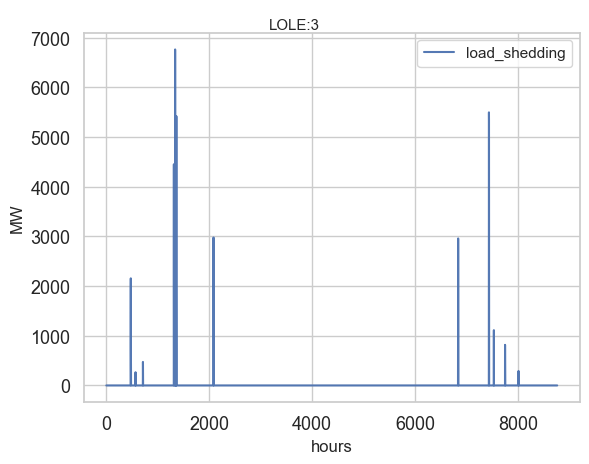

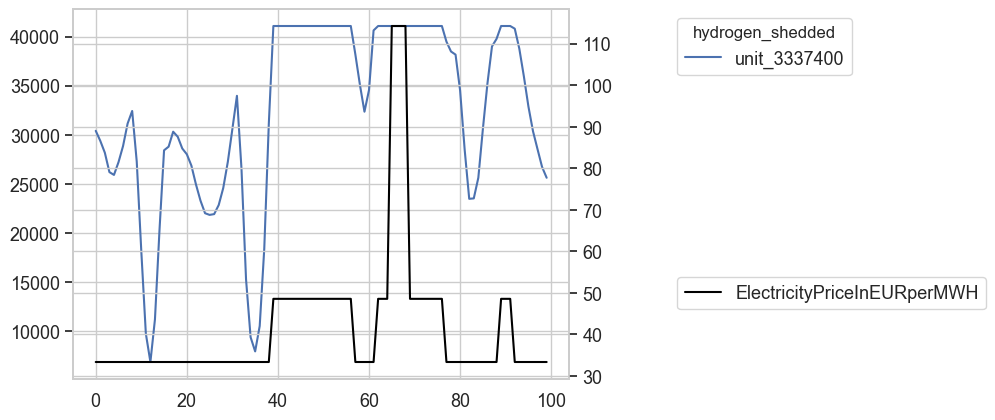

In [506]:
ax1 = load_generation[["load_shedding"]].plot( alpha=0.95)
ax1.annotate("LOLE:" + str(LOLE),
               xy=(0.5, 0.9), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='bottom',
               fontsize='small')

fig1 = ax1.get_figure()
ax1.set_xlabel("hours")
ax1.set_ylabel("MW")
fig1.savefig(path_to_plots + '/' + 'load_shedding.png', bbox_inches='tight', dpi=300)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
hydrogenLS.iloc[0:100].plot(ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1), title = "hydrogen_shedded")
filtered_elec = ElectricityPriceInEURperMWH.loc[(load_generation["load_shedding"]>0) & (ElectricityPriceInEURperMWH <=hydrogen_VOLL)]

ax2.plot(ElectricityPriceInEURperMWH.iloc[0:100] , color = "black")
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'load_shedding_timeseries.png', bbox_inches='tight', dpi=300)

In [507]:
df

,unit_400000000,unit_150000000,unit_50000000,unit_25000000
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
8755,0.0,0.0,0.0,0.0
8756,0.0,0.0,0.0,0.0
8757,0.0,0.0,0.0,0.0
8758,0.0,0.0,0.0,0.0


In [508]:
df = load_generation[["unit_400000000", "unit_150000000","unit_50000000" ,"unit_25000000"  ]]
max_ENS_in_a_row = pd.DataFrame()
for column_name, column_data in df.items():
    continuous_hours = 0  # Counter for continuous hours
    max_continuous_hours = 0  # Counter for maximum continuous hours
    prev_value = 0  # Variable to store the previous value
    filtered = [column_data>0]
    for value in filtered[0]:
        if value == True:
            continuous_hours += 1
        else:
            continuous_hours = 0
        if continuous_hours > max_continuous_hours:
            max_continuous_hours = continuous_hours
    max_ENS_in_a_row.at[0,column_name] =  max_continuous_hours
print(max_ENS_in_a_row)

   unit_400000000  unit_150000000  unit_50000000  unit_25000000
0             2.0             2.0            5.0            6.0


In [509]:
#power consumed in MW
flexconsumer_capped= load_generation["electrolysis_power_consumption"].sum()/1000
totalFlexGWh = round(flexconsumer_capped*electrolysers_results.ConversionFactor[0],0)
print("totalFlexGWh " + str(round(totalFlexGWh,0)))

input_flex_demand_GWh = electrolysers_data.HydrogenProductionTargetInMWH.sum()*12/1000
print("input_H2_demand_GWh " + str(round(input_flex_demand_GWh,0)))

produced_flex_demand = round((totalFlexGWh/input_flex_demand_GWh)*100,2)
print("produced_flex_demand % " +str(produced_flex_demand))

totalFlexGWh 52456.0
input_H2_demand_GWh 51576.0
produced_flex_demand % 101.71


In [510]:
produced_hydrogen  =input_hydrogen_demand - hydrogen_ENS
print("hydrogen produced " + str(produced_hydrogen/1000000))
print("hydrogen_ENS " + str(hydrogen_ENS/1000000))
hydrogen_produced_percent = round((produced_hydrogen /input_hydrogen_demand)*100,2)
print("hydrogen produced/reality " + str(hydrogen_produced_percent))

hydrogen produced 145.72978785598474
hydrogen_ENS 214.05217114401532
hydrogen produced/reality 40.51


In [511]:
# # Input = TWh monthly12901502.5
# Input = 12901502.5*12/electrolysers_results.ConversionFactor[0]
# hydrogen_monthly = 15505796
# hydrogen_yearly = hydrogen_monthly*12

# hydrogen_and_industrial_gwh = (input_industrial_demand + hydrogen_monthly*12)/1000 # GWh
# produced_industrial = input_industrial_demand - industrial_ENS

# print("hydrogen_and_industrial GWh  " + str(round(hydrogen_and_industrial_gwh,0)))

# print("industrial produced " + str(produced_industrial))

# hydrogen_capacityfactor = round(produced_hydrogen /input_hydrogen_demand*100,0)
# print(hydrogen_capacityfactor)
# industrial_monthly = 53920638 #input (separate demands)
# industrial_demand = 46531661# acccording to output
# industrial_produced_percent = round(produced_industrial /industrial_demand*100,0)
# print("industrial produced/reality " + str(industrial_produced_percent))

# # if industry produced from electrolyzer
# industrial_produced_percent =hydrogen_producedin_percent


In [512]:
load_generation.drop(columns=["storages_charging","storages_discharging"], inplace=True)

In [513]:
load_generation.rename(columns={"res": "Wind and Solar",
                              "conventionals": "Nuclear and H2 turbines",
                              "load_shedding": "Load Shedding", 
                              "electrolysis_power_consumption": "Industrial heat",
                              "load": "Inflexible Load",                                
                             }, inplace=True)

In [522]:
a = 8760/12

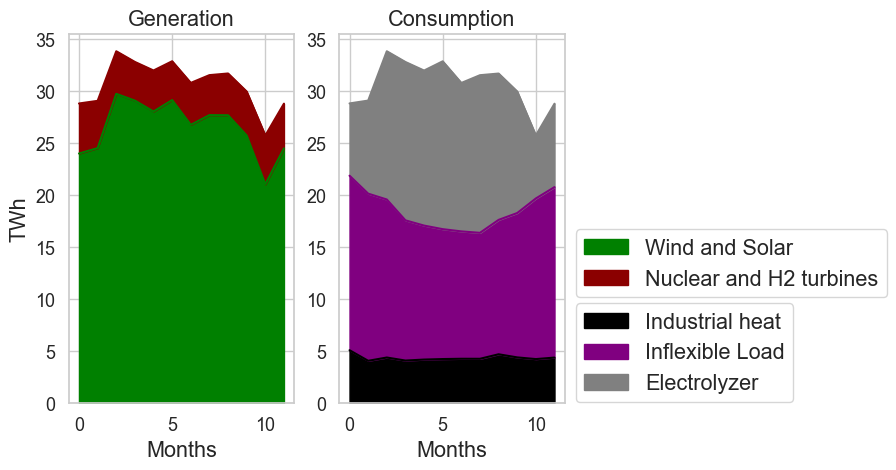

In [523]:
load_generation['group'] = (load_generation.index // a)
grouped = load_generation.groupby(['group']).sum()
grouped = grouped/1000000

# ax1.annotate("H2 :" + str(hydrogen_produced_percent ) + "%  Industrial " + str(produced_flex_demand) + "%",
#                xy=(0.5, 0.7), xycoords='figure fraction',
#                horizontalalignment='right', verticalalignment='bottom',
#                fontsize='small')

fig3, axs3 = plt.subplots(1,2)
grouped[["Wind and Solar", "Nuclear and H2 turbines"]].plot.area( ax=axs3[0], color = fuel_colors)
grouped[[ "Industrial heat",  "Inflexible Load", "Electrolyzer"]].plot.area( ax=axs3[1], color = fuel_colors)
axs3[0].set_title("Generation", fontsize='large')
axs3[1].set_title("Consumption", fontsize='large')
axs3[0].set_xlabel("Months", fontsize='large')
axs3[1].set_xlabel("Months", fontsize='large')
#axs3[0].set_ylim([0,35])

axs3[0].set_ylabel("TWh", fontsize='large')
axs3[0].legend(fontsize='large', loc='upper left', bbox_to_anchor=(2.2,0.5))
axs3[1].legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 0.3))

fig3.savefig(path_to_plots + '/' + 'monthly_production.png', bbox_inches='tight', dpi=300)